# Exercise 1: Data Exploration and Preprocessing



**Importing Libraries**

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

**Load the Dataset**

In [53]:
data = pd.read_csv('customer_segmentation.csv')

Data Exploration


In [54]:
print(data.head())

   CustomerID  Age  AnnualIncome  SpendingScore
0           1   22         15000             39
1           2   35         40000             81
2           3   26         30000             77
3           4   40         50000             40
4           5   55        100000              6


Check for missing values:

In [55]:
print(data.isnull().sum())

CustomerID       0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64


Explore distribution of features:

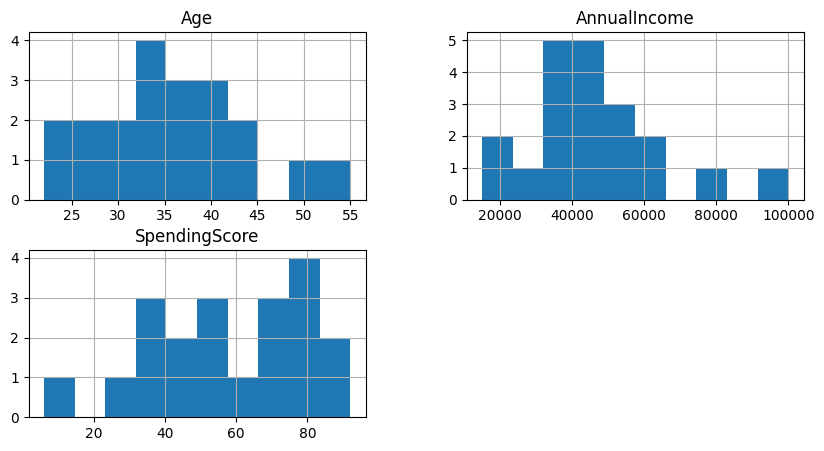

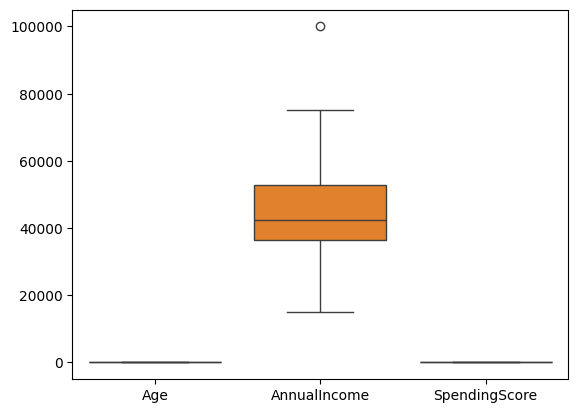

In [56]:
# Histograms
data[['Age', 'AnnualIncome', 'SpendingScore']].hist(bins=10, figsize=(10, 5))
plt.show()

# Box plots
sns.boxplot(data=data[['Age', 'AnnualIncome', 'SpendingScore']])
plt.show()

Normalize or standardize numerical columns:

In [57]:
scaler = StandardScaler()
data[['Age', 'AnnualIncome', 'SpendingScore']] = scaler.fit_transform(data[['Age', 'AnnualIncome', 'SpendingScore']])

# Exercise 2: Implementing K-Means Clustering

1. Initial Model Implementation

In [58]:
kmeans = KMeans(n_clusters=3)
data['Cluster'] = kmeans.fit_predict(data[['Age', 'AnnualIncome', 'SpendingScore']])

2. Choosing Optimal k

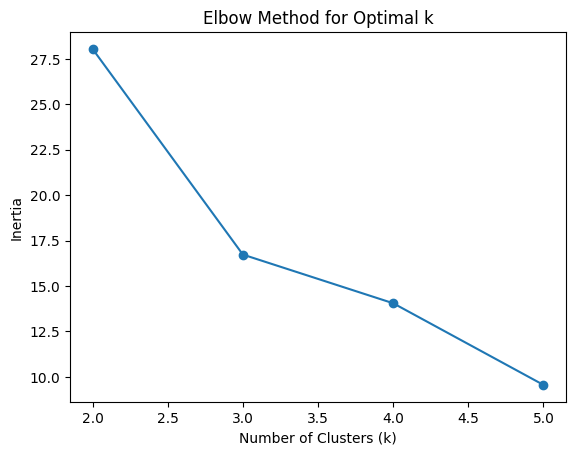

In [59]:
inertia = []
k_values = range(2, 6)

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data[['Age', 'AnnualIncome', 'SpendingScore']])
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

3. Cluster Visualization

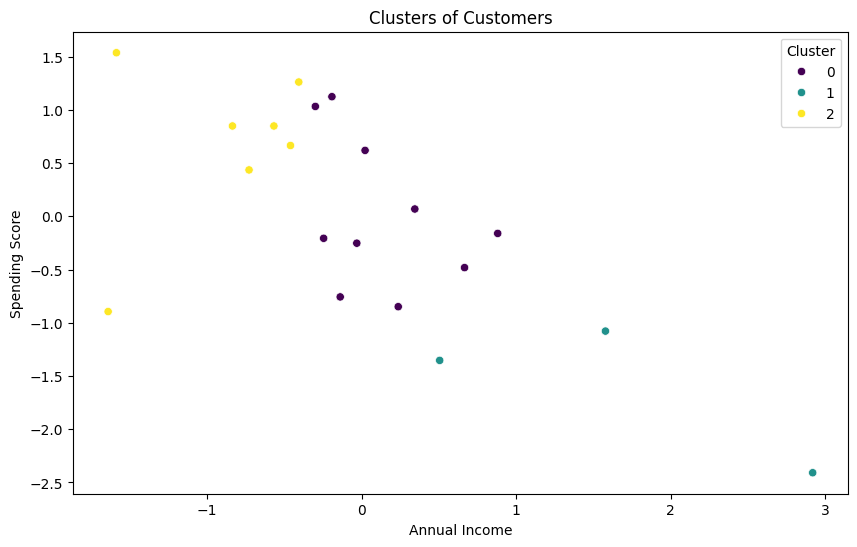

In [60]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['AnnualIncome'], y=data['SpendingScore'], hue=data['Cluster'], palette='viridis')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

# Exercise 3: Model Evaluation

1. Silhouette Score

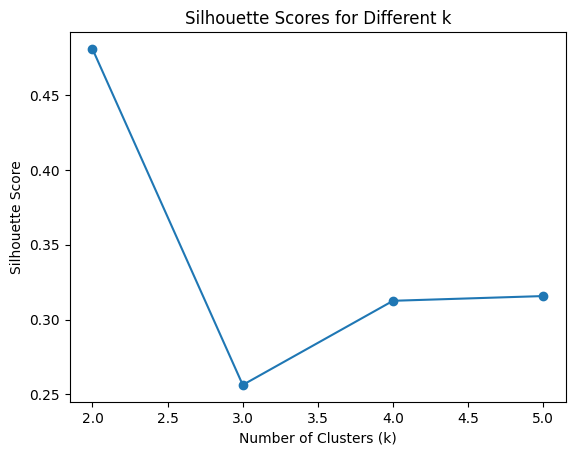

In [61]:
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(data[['Age', 'AnnualIncome', 'SpendingScore']])
    silhouette_scores.append(silhouette_score(data[['Age', 'AnnualIncome', 'SpendingScore']], labels))

plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k')
plt.show()

2. Cluster Analysis


In [63]:
cluster_analysis = data.groupby('Cluster').mean()[['Age', 'AnnualIncome', 'SpendingScore']]
print(cluster_analysis)

              Age  AnnualIncome  SpendingScore
Cluster                                       
0        0.204271      0.123357       0.013764
1        1.706267      1.666210      -1.613472
2       -1.023074     -0.890314       0.671825


# Exercise 4: Interpretation and Reporting

In [64]:
report = """
1. Cluster Interpretation
   Provide a brief interpretation of what each cluster represents based on average characteristics.

2. Report
   Summarize:
   - The data exploration process.
   - Results of K-means clustering and optimal value of k.
   - Characteristics of each cluster.
   - Insights from clustering analysis.

3. Visualizations
   Include relevant visualizations like:
   - Elbow Method plot.
   - Silhouette scores plot.
   - Cluster scatter plots.

This structured approach will help in understanding customer segmentation based on age, income, and spending behavior effectively using K-means clustering.
"""

print(report)


1. Cluster Interpretation
   Provide a brief interpretation of what each cluster represents based on average characteristics.

2. Report
   Summarize:
   - The data exploration process.
   - Results of K-means clustering and optimal value of k.
   - Characteristics of each cluster.
   - Insights from clustering analysis.

3. Visualizations
   Include relevant visualizations like:
   - Elbow Method plot.
   - Silhouette scores plot.
   - Cluster scatter plots.

This structured approach will help in understanding customer segmentation based on age, income, and spending behavior effectively using K-means clustering.

